In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Reading CSV File
columns_name = [
    "time", "gender", "matric_%", "study_year","faculty","gpa_2023","accomodation","allowance","scholarship","study_hours",
    "party_week","drinks_night","missed_classes", "failed_classes", "in_relationship","parent_approve","relation_parent"
]
student_data = pd.read_csv("survey_student.csv", names = columns_name, header = 0)

In [3]:
student_data.head()

,time,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## Exploratory Data Analysis (EDA)

* basic information
* missing values
* numerical and categorical values
* exploration
* visulization
* correlation , outliers

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             406 non-null    object 
 1   gender           404 non-null    object 
 2   matric_%         399 non-null    float64
 3   study_year       333 non-null    object 
 4   faculty          399 non-null    object 
 5   gpa_2023         320 non-null    float64
 6   accomodation     383 non-null    object 
 7   allowance        375 non-null    object 
 8   scholarship      398 non-null    object 
 9   study_hours      403 non-null    object 
 10  party_week       404 non-null    object 
 11  drinks_night     404 non-null    object 
 12  missed_classes   403 non-null    object 
 13  failed_classes   403 non-null    object 
 14  in_relationship  403 non-null    object 
 15  parent_approve   402 non-null    object 
 16  relation_parent  403 non-null    object 
dtypes: float64(2), o

In [5]:
student_data.isna().sum()

time                0
gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

-- description --

In [6]:
student_data.gender.value_counts(normalize = True)

gender
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

In this survey, there are 53% of Male and 47% of Female students.

In [7]:
# parent_approve , replation_parent

table = pd.crosstab(student_data.parent_approve, student_data.relation_parent)
table = table[["Distant","Fair","Close","Very close"]]
table

relation_parent,Distant,Fair,Close,Very close
parent_approve,,,,
No,1,9,18,20
Yes,1,25,79,248


<Axes: xlabel='relation_parent'>

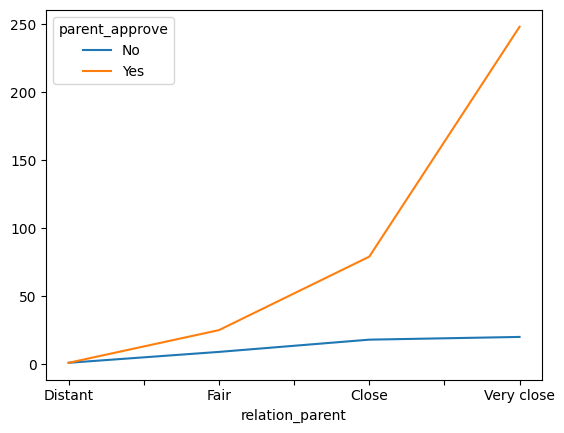

In [8]:
table.T.plot.line()

-- description --

### Relationship with parent closeness and score gained

In [9]:
group_parent = student_data.groupby(by= "relation_parent")
info = group_parent["matric_%"].aggregate(('min','max','mean'))

In [10]:
info

,min,max,mean
relation_parent,,,
Close,60.0,98.33,77.690000
Distant,85.0,98.00,91.500000
Fair,55.0,95.50,78.357143
Very close,34.0,99.00,77.960114


<Axes: xlabel='relation_parent'>

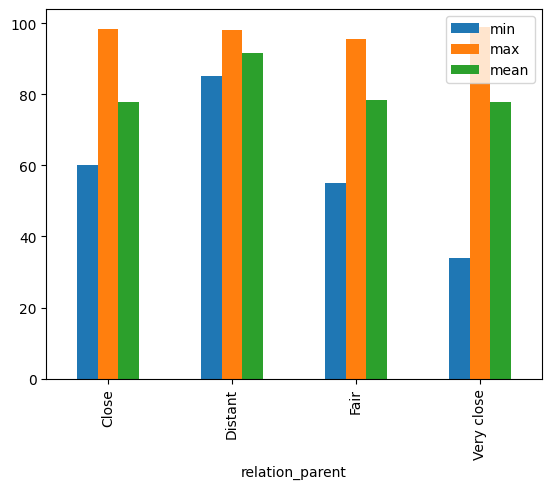

In [11]:
info.plot.bar()

In [20]:
group_parent = student_data.groupby(by= "faculty")
info = group_parent["gpa_2023"].aggregate("mean")

<Axes: xlabel='faculty'>

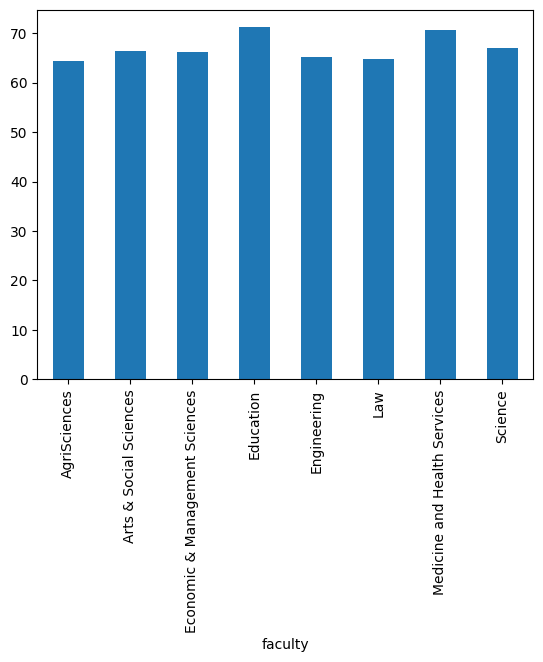

In [22]:
info.plot.bar()

<Axes: xlabel='matric_%', ylabel='gpa_2023'>

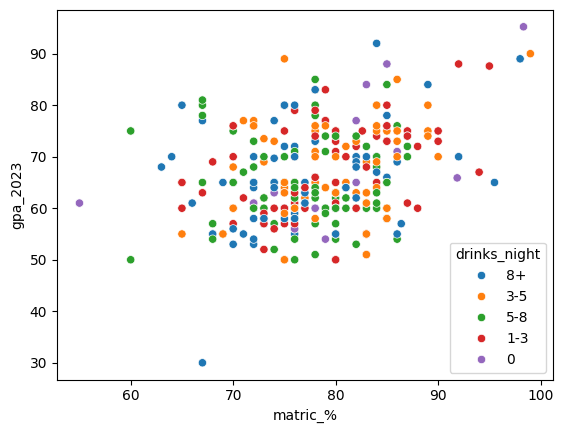

In [14]:
# Bubble Chart

sns.scatterplot(student_data,x = "matric_%", y = "gpa_2023", hue = "drinks_night")

In [15]:
group_parent = student_data.groupby(by= "relation_parent")
info = group_parent[["matric_%","gpa_2023"]].aggregate(('min','max','mean'))
info

matric_%                   gpa_2023                  
                     min    max       mean      min    max       mean
relation_parent                                                      
Close               60.0  98.33  77.690000     50.0  95.22  65.220769
Distant             85.0  98.00  91.500000     88.0  89.00  88.500000
Fair                55.0  95.50  78.357143     50.0  85.00  66.258065
Very close          34.0  99.00  77.960114     30.0  92.00  66.527356

<Axes: xlabel='relation_parent'>

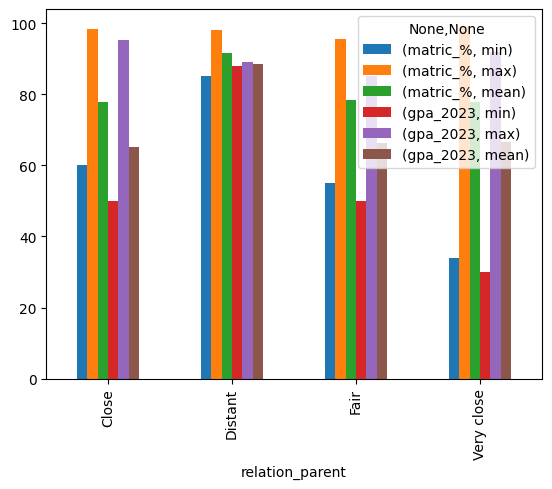

In [16]:
info.plot.bar()

<Axes: xlabel='None-None', ylabel='relation_parent'>

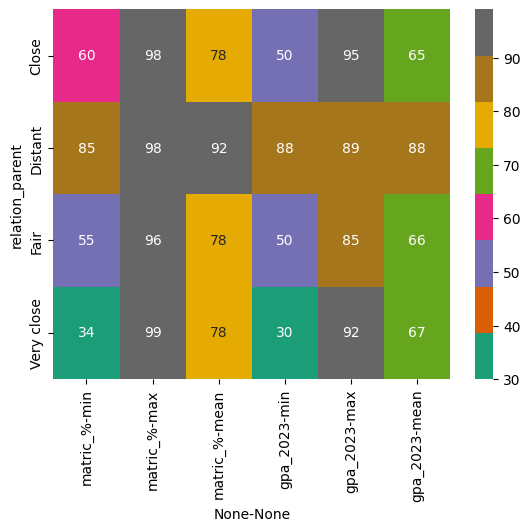

In [17]:
sns.heatmap(info, annot= True, cmap='Dark2')

<Axes: xlabel='gpa_2023', ylabel='gender'>

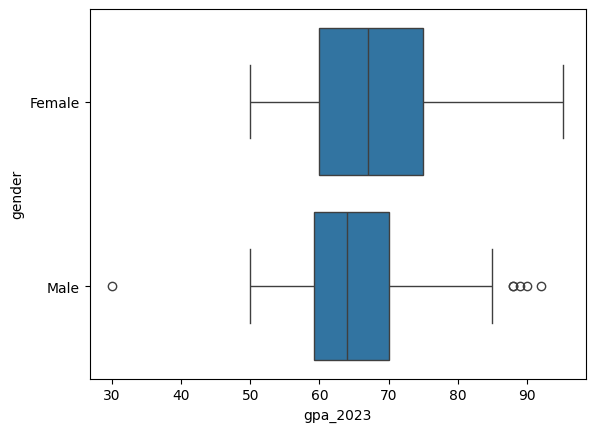

In [18]:
sns.boxplot(student_data, x = 'gpa_2023',y='gender')

In [19]:
student_data.corr(numeric_only=True)

,matric_%,gpa_2023
matric_%,1.000000,0.299104
gpa_2023,0.299104,1.000000
